In [16]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from category_encoders import JamesSteinEncoder #not sure if using
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics


In [17]:
import pandas as pd
from sklearn import datasets

# Load dataset
digits = datasets.load_digits()

# Create a DataFrame with the pixel data
df = pd.DataFrame(digits.data)

# Add the target (labels) as a new column
df['target'] = digits.target

# Show the first 5 rows
print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


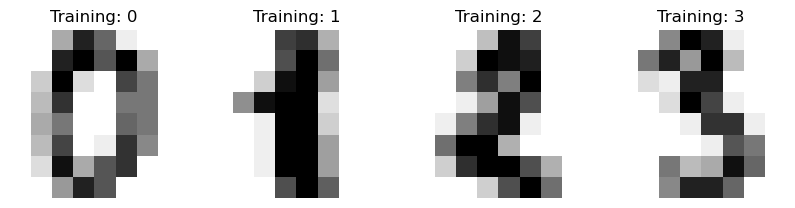

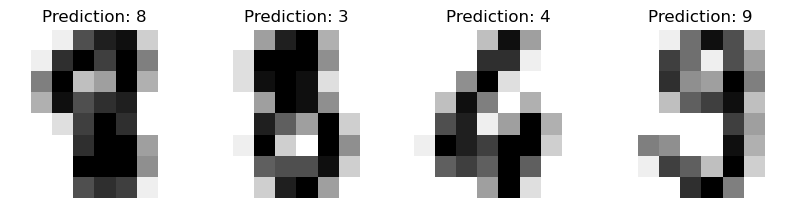

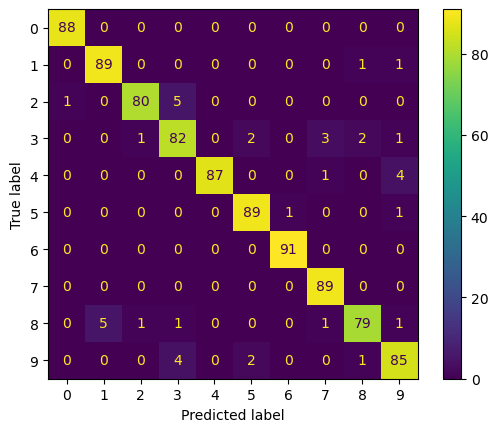

In [18]:
# image recognition



digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Training: %i" % label)

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = KNeighborsClassifier()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")



metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)



In [19]:
styles = pd.read_csv("data/styles.csv",on_bad_lines='skip')
styles.head()
styles.info()`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [77]:

styles = styles[styles['articleType'] != 'Free Gifts']
styles[styles['articleType']=='Free Gifts'].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_path


In [79]:
# Create a new column with full image file paths
styles['image_path'] = styles['id'].apply(lambda x: os.path.join("data\\images", f"{x}.jpg"))
styles = styles[styles['image_path'].apply(os.path.exists)]
print (len(styles))
# Check the result
print(styles[['id', 'image_path']].head())

20462
      id             image_path
0  15970  data\images\15970.jpg
3  21379  data\images\21379.jpg
5   1855   data\images\1855.jpg
6  30805  data\images\30805.jpg
7  26960  data\images\26960.jpg


In [81]:
# DATA CLEANING

from category_encoders import JamesSteinEncoder

styles['productDisplayName'] = styles['productDisplayName'].fillna('Unknown Product')
usage_mode = styles['usage'].mode()[0]
styles['usage'] = styles['usage'].fillna(usage_mode)
color_mode = styles['baseColour'].mode()[0]

# Fill missing values
styles['baseColour'] = styles['baseColour'].fillna(color_mode)

styles.isnull().sum()


id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image_path            0
dtype: int64

In [83]:
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,data\images\15970.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,data\images\21379.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,data\images\1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,data\images\30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,data\images\26960.jpg


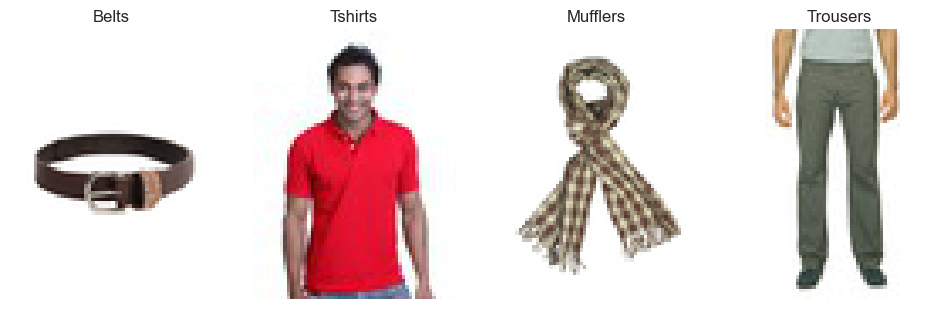

In [85]:
from PIL import Image

# Display the first image
#img = Image.open(styles.iloc[0]['image_path'])
#img.show()


# Choose 4 random rows
sample = styles.sample(4)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for ax, (_, row) in zip(axes, sample.iterrows()):
    image = Image.open(row['image_path']).convert('RGB')
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title(row['articleType'])  # or use subCategory, gender, etc.



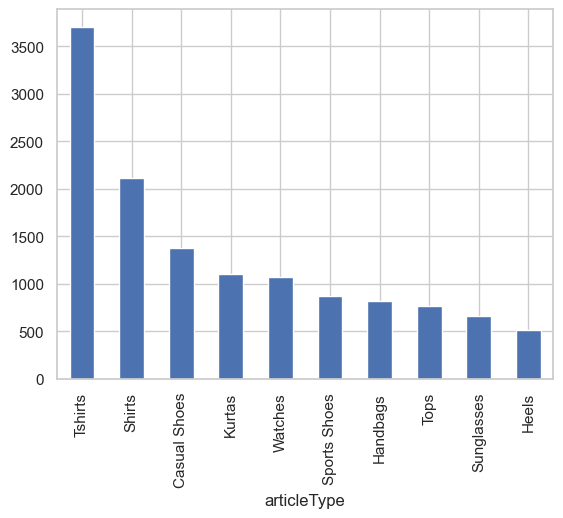

In [101]:
styles["articleType"].value_counts().nlargest(10).plot(kind='bar')

plt.show()

In [89]:
IMAGE_SIZE = (64, 64)

def preprocess_image(path):
    img = Image.open(path).convert('L').resize(IMAGE_SIZE)
    return np.array(img).flatten()  # Shape: (4096,)

# Flatten all images
X = np.array([preprocess_image(p) for p in styles['image_path']])


In [90]:
columns_to_encode = ['gender', 'masterCategory', 'subCategory', 'baseColour', 'season', 'year']

#id	❌ No	Drop (not useful for learning)
#gender	✅ Yes (optional)	Convert using LabelEncoder or get_dummies
#masterCategory	✅ Yes	Encode it
#subCategory	✅ Yes	Encode it
#articleType	✅ Usually target	Encode as y (label)
#baseColour	✅ Optional	Encode or drop if unimportant
#season	✅ Optional	Encode or drop
#year	✅ Yes	Already numeric — just cast to int
#usage	✅ Optional	Encode or drop if messy
#productDisplayName	❌ No	Drop (textual, messy, too specific)
# Fit and transform
js_encoder = JamesSteinEncoder(cols=columns_to_encode)
encoded_df = js_encoder.fit_transform(styles[columns_to_encode], styles['articleType'])


In [95]:
# Create a classifier: a support vector classifier
clf = KNeighborsClassifier()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
   X, styles['articleType'], test_size=0.2, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print (y_test)
print (predicted)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

35565           Heels
35566    Casual Shoes
35568            Tops
35569        Handbags
35571         Wallets
             ...     
44414         Tshirts
44415         Tshirts
44417         Tshirts
44419    Casual Shoes
44421         Tshirts
Name: articleType, Length: 4093, dtype: object
['Casual Shoes' 'Casual Shoes' 'Tops' ... 'Tops' 'Casual Shoes' 'Tshirts']
Accuracy: 0.7500610798924994


In [28]:
for true, pred in zip(y_test.values, predicted):
    print(f"Actual: {true} — Predicted: {pred}")

Actual: Kurtas — Predicted: Kurtas
Actual: Sandals — Predicted: Sandals
Actual: Handbags — Predicted: Handbags
Actual: Casual Shoes — Predicted: Casual Shoes
Actual: Tshirts — Predicted: Tshirts
Actual: Shirts — Predicted: Jackets
Actual: Jeans — Predicted: Jeans
Actual: Free Gifts — Predicted: Watches
Actual: Scarves — Predicted: Jackets
Actual: Handbags — Predicted: Bra
Actual: Sweatshirts — Predicted: Sweaters
Actual: Shirts — Predicted: Shirts
Actual: Kurtas — Predicted: Kurtas
Actual: Suspenders — Predicted: Suspenders
Actual: Tshirts — Predicted: Shirts
Actual: Wallets — Predicted: Wallets
Actual: Tshirts — Predicted: Tshirts
Actual: Tshirts — Predicted: Tshirts
Actual: Handbags — Predicted: Handbags
Actual: Shirts — Predicted: Tshirts
Actual: Caps — Predicted: Caps
Actual: Casual Shoes — Predicted: Formal Shoes
Actual: Kurtas — Predicted: Kurtas
Actual: Sweatshirts — Predicted: Shirts
Actual: Handbags — Predicted: Handbags
Actual: Shirts — Predicted: Shirts
Actual: Jeans — Predi

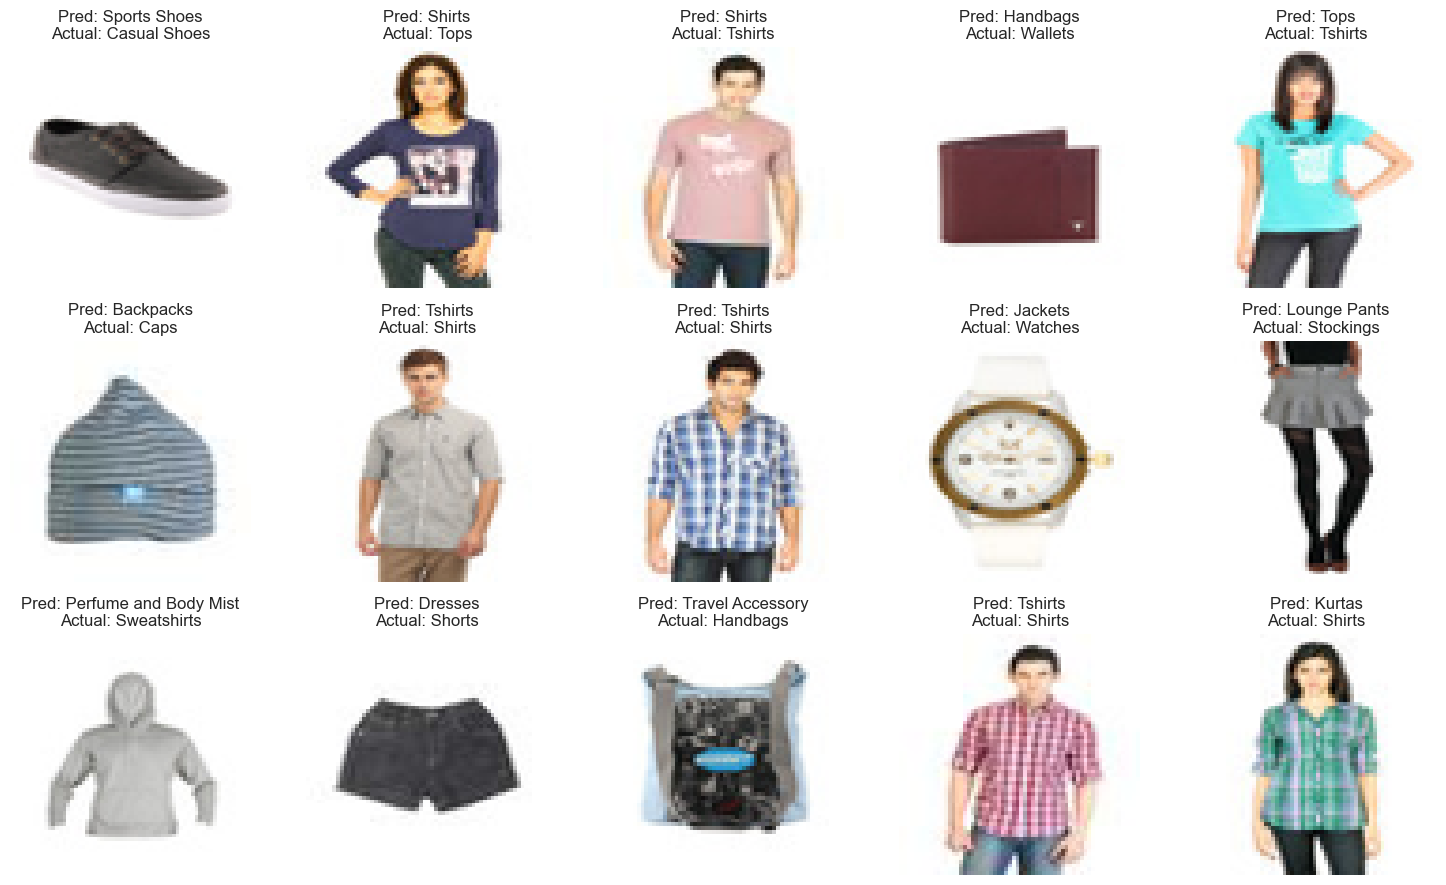

In [115]:
import matplotlib.pyplot as plt
import math

# Get the test set image paths
test_paths = styles.loc[y_test.index, 'image_path'].values  # ✅

# Loop through and show incorrect predictions
wrong = [(i, p, a) for i, (p, a) in enumerate(zip(predicted, y_test.values)) if p != a]
#Number of images you want to show
show_num = 15  # for example

# Set number of columns (images per row)
cols = 5
rows = math.ceil(show_num / cols)

plt.figure(figsize=(3 * cols, 3 * rows))  # adjust size as needed

for i, (idx, pred, actual) in enumerate(wrong[:show_num]):
    img = Image.open(test_paths[idx]).resize((64, 64))
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Pred: {pred}\nActual: {actual}')

plt.tight_layout()
plt.show()

In [30]:
#Try multiple models to see what works
#GridSearch

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# define the models
models = {
    'kNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    #'SVM': SVC() #takes too long
}
    # Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
   X, styles['articleType'], test_size=0.2, shuffle=False
)
for name, model in models.items():
    # Create a classifier: a support vector classifier
    clf = model
    
    # Learn the digits on the train subset
    clf.fit(X_train, y_train)
    
    # Predict the value of the digit on the test subset
    predicted = clf.predict(X_test)
    print (y_test)
    print (predicted)
    accuracy = clf.score(X_test, y_test)
    print(name + " Accuracy:", accuracy)

35565           Heels
35566    Casual Shoes
35568            Tops
35569        Handbags
35571         Wallets
             ...     
44414         Tshirts
44415         Tshirts
44417         Tshirts
44419    Casual Shoes
44421         Tshirts
Name: articleType, Length: 4093, dtype: object
['Casual Shoes' 'Casual Shoes' 'Tops' ... 'Tops' 'Casual Shoes' 'Tshirts']
kNN Accuracy: 0.7500610798924994


C:\Users\lorig\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


35565           Heels
35566    Casual Shoes
35568            Tops
35569        Handbags
35571         Wallets
             ...     
44414         Tshirts
44415         Tshirts
44417         Tshirts
44419    Casual Shoes
44421         Tshirts
Name: articleType, Length: 4093, dtype: object
['Casual Shoes' 'Casual Shoes' 'Tops' ... 'Tops' 'Casual Shoes' 'Tshirts']
Logistic Regression Accuracy: 0.718299535792817
35565           Heels
35566    Casual Shoes
35568            Tops
35569        Handbags
35571         Wallets
             ...     
44414         Tshirts
44415         Tshirts
44417         Tshirts
44419    Casual Shoes
44421         Tshirts
Name: articleType, Length: 4093, dtype: object
['Heels' 'Sports Shoes' 'Shirts' ... 'Tshirts' 'Sports Shoes' 'Tshirts']
Decision Tree Accuracy: 0.6474468604935255


C:\Users\lorig\AppData\Local\Temp\ipykernel_63008\1856849906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y='Accuracy', palette='pastel')


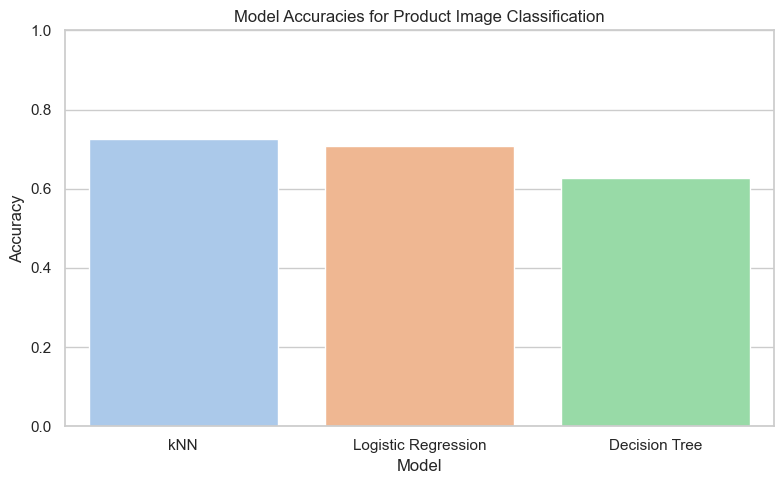

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Model accuracies
model_accuracies = {
    'kNN': 0.7251781704578737,
    'Logistic Regression': 0.7078980767353314,
    'Decision Tree': 0.6275505223079176
}

# Convert to DataFrame
df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Seaborn barplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Model', y='Accuracy', palette='pastel')
plt.ylim(0, 1)
plt.title('Model Accuracies for Product Image Classification')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig('images/initial_model_accuracies.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
   X, styles['articleType'], test_size=0.5, shuffle=False
)


clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
boost_acc = clf.score(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)

KeyboardInterrupt: 